# CES 관련 토픽 TOP 5와 일별 감성점수 추출

In [1]:
# 형태소 분석
from konlpy.tag import Mecab

# 불용어 지정
def get_stopWords():
    # 불용어 파일 경로 확인-------------------------------------------------------------------------------------------------------------------
    stop_words = open("/home/joe/amr_ws/eda/data/koreanStopwords.txt", "r")
    lines = stop_words.readlines()
    stop_word = []
    for line in lines:
        line = line.replace("\n", "")
        stop_word.append(line)
    stop_words.close()
    return stop_word

# mecab 모듈을 이용 형태소로 분리 후 형태소가 한 글자이거나 불용어 리스트에 해당된다면 삭제
def get_tokenized_article(refined_article):
    stop_words = get_stopWords()
    m = Mecab()
    tokenized = []

    for row in refined_article:
        inner = []
        row = str(row)
        text = m.morphs(row)
        
        for word in text:
            
            if (len(word) == 1) or (word in stop_words):
                pass
            else:
                inner.append(word)

        tokenized.append(inner)
    
    return tokenized

# 형태소 분리한 제목과 기사내용 열을 새롭게 추가
import pandas as pd
df=pd.read_csv("../../data/CES/2023_CES_predicted.csv", sep = ",")

df["tokenized_text"] = get_tokenized_article(df["text"])
df["tokenized_title"] = get_tokenized_article(df["title"])
# df.drop(["Unnamed: 0"], axis = 1,inplace=True)

df

,date,title,text,prediction,score,tokenized_text,tokenized_title
0,2023-12-01 00:11:03,지역 컨벤션센터 수익성 넘어 경제 사회 문화 파급효과 따져야 MICE,['강릉시 주최 강릉 마이스도시 포럼 김봉석 교수 컨벤션센터 역할 기조강연 기업활동...,중립,0.537118,"[강릉시, 주최, 강릉, 마이, 도시, 포럼, 김봉석, 교수, 컨벤션, 역할, 기조...","[지역, 컨벤션, 수익, 경제, 문화, 파급, 효과, 따져야, MICE]"
1,2023-12-01 00:21:01,K마이스 지속성장 위해 총괄법 제정하고 ESG 기회 삼아야 MICE,['전시산업전 마이스 엑스포 마이스인쇼 릴레이 개최 전문가들 산업영역 타깃시장 재정...,중립,0.513209,"[전시, 마이, 엑스포, 마이, 릴레이, 개최, 전문가, 영역, 타깃, 정립, 강조...","[마이, 지속, 총괄, 제정, ESG, 기회, MICE]"
2,2023-12-01 07:15:00,헬스가전 업계 국내 넘어 CES 2024 서 기술 대결 펼친다,['바디프랜드 세라젬 CES 혁신상 수상하며 전초전 로보워킹 앞세운 바디프랜드 신제...,중립,0.503080,"[디프, 랜드, 세라, CES, 혁신, 수상, 전초전, 워킹, 앞세운, 디프, 랜드...","[헬스, 업계, CES, 대결, 펼친다]"
3,2023-12-01 07:37:01,박은빈 계명대 대학원생 인셉션랩 CES 2024 에서 혁신상 수상,"['박은빈 인셉션랩 대표.', '계명대 제공 헤럴드경제 대구 김병진 기자 계명대는 ...",호재,0.698458,"[박은빈, 인셉션, 계명, 헤럴드, 경제, 대구, 김병진, 계명, 인공지능, 컴퓨터...","[박은빈, 계명, 대학원, 인셉션, CES, 혁신, 수상]"
4,2023-12-01 09:07:01,롯데 기술 도입 및 전략 다변화 통해 혁신 가속화,['롯데마트 데일리안 임유정 기자 롯데는 AI 인공지능 메타버스 등 다양한 ICT ...,호재,0.661369,"[롯데마트, 데일리안, 임유정, 롯데, AI, 인공지능, 메타, 버스, ICT, 선...","[롯데, 전략, 다변, 혁신, 가속]"
...,...,...,...,...,...,...,...
758,2024-01-23 16:39:03,한지형 오토노머스에이투지 대표 2024 CES 모빌리티 리뷰,['ICT 전문가들이 전하는 CES2024 리뷰 인사이트 콘서트가 전자신문 주최로 ...,중립,1.000000,"[ICT, 전문가, 전하, CES, 리뷰, 인사이트, 콘서트, 신문, 주최, 송파구...","[한지형, 오토, 머스, 투지, CES, 모빌리티, 리뷰]"
759,2024-01-23 17:32:03,초대석 CES 참석과 솔로몬의 선택 시민 위해 변화하는 성남,['출연 신상진 성남시장 경기 성남시가 올해 새로운 성남의 장을 열겠다는 포부를 밝...,호재,0.624096,"[출연, 신상진, 성남, 경기, 성남시, 새로운, 성남, 포부, 노후, 도시, 정비...","[초대석, CES, 참석, 솔로몬, 선택, 시민, 변화, 성남]"
760,2024-01-23 17:49:10,원컨덕터 2024 CES 참가 TSID 운영체계의 장애인용 키오스크 선봬,['원컨덕터가 시흥산업진흥원의 지원으로 2024년 CES 국제전자제품박람회 에 참가...,호재,0.810550,"[시흥, 업진, 흥원, CES, 국제, 박람회, 참가, 인증, 주체, 본인, TSI...","[CES, 참가, TSID, 체계, 장애, 인용, 키오스]"
761,2024-01-23 18:34:06,서울시립대 CES 참관단 파견 전시부스 운영,['CES 2024 에 참관단 파견해 네트워킹 강화 전시 부스 운영 연구 목표 증진...,호재,0.714145,"[CES, 참관단, 파견, 네트, 워킹, 강화, 전시, 부스, 목표, 증진, 기회,...","[시립, CES, 참관단, 파견, 전시, 부스]"


In [2]:
# mecab 없는 경우
# import pandas as pd
# df = pd.read_csv("../../data/eda_project/rainbow/2023_rainbow_predicted.csv", sep = ",")
# df1 = pd.read_csv("../../data/eda_project/tokenized_robot_2023.csv", sep = ",")
# df["tokenized_text"] = df1["tokenized_text"]
# df["tokenized_title"] = df1["tokenized_title"]
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("[", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("]", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.replace("'", ''))
# df["tokenized_text"] = df["tokenized_text"].apply(lambda x: x.split(", "))
# df.iloc[0]["tokenized_text"]


In [2]:
# 호재, 악재에 대해서 중립은 0, 악재는 -1을 곱해줘 스코어 판독
df.loc[df["prediction"]=="중립", "score"] = 0
df.loc[(df["prediction"]=="악재"), "score"] = df.loc[(df["prediction"]=="악재"), "score"] * (-1)

# datetime으로 변환
df["date"] = pd.to_datetime(df["date"])

# 새로운 열을 만들어 일(day), 월(month) 단위로 쪼갬
df["date_day"] = df["date"].dt.date
df["date_month"] = df["date"].dt.to_period("M")

df

,date,title,text,prediction,score,tokenized_text,tokenized_title,date_day,date_month
0,2023-12-01 00:11:03,지역 컨벤션센터 수익성 넘어 경제 사회 문화 파급효과 따져야 MICE,['강릉시 주최 강릉 마이스도시 포럼 김봉석 교수 컨벤션센터 역할 기조강연 기업활동...,중립,0.000000,"[강릉시, 주최, 강릉, 마이, 도시, 포럼, 김봉석, 교수, 컨벤션, 역할, 기조...","[지역, 컨벤션, 수익, 경제, 문화, 파급, 효과, 따져야, MICE]",2023-12-01,2023-12
1,2023-12-01 00:21:01,K마이스 지속성장 위해 총괄법 제정하고 ESG 기회 삼아야 MICE,['전시산업전 마이스 엑스포 마이스인쇼 릴레이 개최 전문가들 산업영역 타깃시장 재정...,중립,0.000000,"[전시, 마이, 엑스포, 마이, 릴레이, 개최, 전문가, 영역, 타깃, 정립, 강조...","[마이, 지속, 총괄, 제정, ESG, 기회, MICE]",2023-12-01,2023-12
2,2023-12-01 07:15:00,헬스가전 업계 국내 넘어 CES 2024 서 기술 대결 펼친다,['바디프랜드 세라젬 CES 혁신상 수상하며 전초전 로보워킹 앞세운 바디프랜드 신제...,중립,0.000000,"[디프, 랜드, 세라, CES, 혁신, 수상, 전초전, 워킹, 앞세운, 디프, 랜드...","[헬스, 업계, CES, 대결, 펼친다]",2023-12-01,2023-12
3,2023-12-01 07:37:01,박은빈 계명대 대학원생 인셉션랩 CES 2024 에서 혁신상 수상,"['박은빈 인셉션랩 대표.', '계명대 제공 헤럴드경제 대구 김병진 기자 계명대는 ...",호재,0.698458,"[박은빈, 인셉션, 계명, 헤럴드, 경제, 대구, 김병진, 계명, 인공지능, 컴퓨터...","[박은빈, 계명, 대학원, 인셉션, CES, 혁신, 수상]",2023-12-01,2023-12
4,2023-12-01 09:07:01,롯데 기술 도입 및 전략 다변화 통해 혁신 가속화,['롯데마트 데일리안 임유정 기자 롯데는 AI 인공지능 메타버스 등 다양한 ICT ...,호재,0.661369,"[롯데마트, 데일리안, 임유정, 롯데, AI, 인공지능, 메타, 버스, ICT, 선...","[롯데, 전략, 다변, 혁신, 가속]",2023-12-01,2023-12
...,...,...,...,...,...,...,...,...,...
758,2024-01-23 16:39:03,한지형 오토노머스에이투지 대표 2024 CES 모빌리티 리뷰,['ICT 전문가들이 전하는 CES2024 리뷰 인사이트 콘서트가 전자신문 주최로 ...,중립,0.000000,"[ICT, 전문가, 전하, CES, 리뷰, 인사이트, 콘서트, 신문, 주최, 송파구...","[한지형, 오토, 머스, 투지, CES, 모빌리티, 리뷰]",2024-01-23,2024-01
759,2024-01-23 17:32:03,초대석 CES 참석과 솔로몬의 선택 시민 위해 변화하는 성남,['출연 신상진 성남시장 경기 성남시가 올해 새로운 성남의 장을 열겠다는 포부를 밝...,호재,0.624096,"[출연, 신상진, 성남, 경기, 성남시, 새로운, 성남, 포부, 노후, 도시, 정비...","[초대석, CES, 참석, 솔로몬, 선택, 시민, 변화, 성남]",2024-01-23,2024-01
760,2024-01-23 17:49:10,원컨덕터 2024 CES 참가 TSID 운영체계의 장애인용 키오스크 선봬,['원컨덕터가 시흥산업진흥원의 지원으로 2024년 CES 국제전자제품박람회 에 참가...,호재,0.810550,"[시흥, 업진, 흥원, CES, 국제, 박람회, 참가, 인증, 주체, 본인, TSI...","[CES, 참가, TSID, 체계, 장애, 인용, 키오스]",2024-01-23,2024-01
761,2024-01-23 18:34:06,서울시립대 CES 참관단 파견 전시부스 운영,['CES 2024 에 참관단 파견해 네트워킹 강화 전시 부스 운영 연구 목표 증진...,호재,0.714145,"[CES, 참관단, 파견, 네트, 워킹, 강화, 전시, 부스, 목표, 증진, 기회,...","[시립, CES, 참관단, 파견, 전시, 부스]",2024-01-23,2024-01


# 2. 월별 기사 갯수 및 호재, 악재 추이
---

In [7]:
# mysql 이용
import mysql.connector
import pandas as pd
from tqdm.notebook import tqdm
conn = mysql.connector.connect(
    host = "database-1.cvsau8siiw7o.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "amrbase1",
    database = "amrbase"
)
# cur = conn.cursor(buffered= True)
# sql = "SELECT * from predicted_CES;"

cur = conn.cursor(buffered= True)
sql = "SELECT MONTH(date) month, DAY(date) day, count(*) as count \
FROM predicted_CES \
WHERE title LIKE '%AI%' \
   OR detail LIKE '%AI%' \
GROUP BY month, day \
order by month desc, day"
cur.execute(sql)
result = cur.fetchall()
monthly_article = pd.DataFrame(result, columns= ["월", "일", "뉴스수"])
monthly_article

,월,일,뉴스수
0,12,1,9
1,12,3,2
2,12,4,2
3,12,6,4
4,12,7,11
5,12,8,3
6,12,11,2
7,12,13,2
8,12,14,19
9,12,15,3


/tmp/ipykernel_20944/2016965558.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_article["일"][:20], y = monthly_article["뉴스수"], palette="YlGnBu", width = 0.5)
/tmp/ipykernel_20944/2016965558.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_article["일"][20:], y = monthly_article["뉴스수"], palette="YlGnBu", width = 0.5)


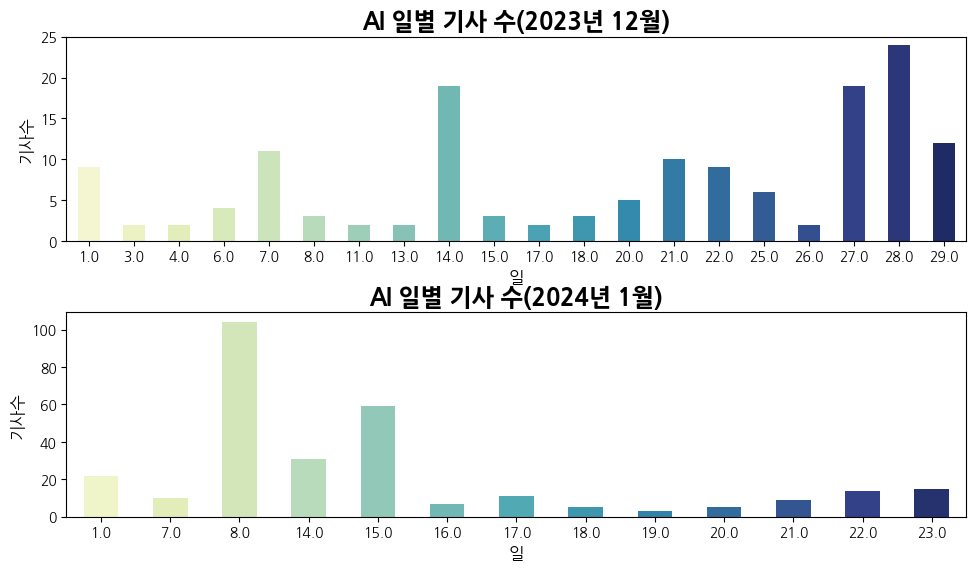

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
plt.subplot(2, 1, 1)
sns.barplot(x = monthly_article["일"][:20], y = monthly_article["뉴스수"], palette="YlGnBu", width = 0.5)
plt.title("AI 일별 기사 수(2023년 12월)", fontsize = 17, weight = "bold")
plt.xlabel("일", fontsize = 12)
plt.ylabel("기사수", fontsize = 12)
plt.ylim(0, 25)

plt.subplot(2, 1, 2)
sns.barplot(x = monthly_article["일"][20:], y = monthly_article["뉴스수"], palette="YlGnBu", width = 0.5)
plt.title("AI 일별 기사 수(2024년 1월)", fontsize = 17, weight = "bold")
plt.xlabel("일", fontsize = 12)
plt.ylabel("기사수", fontsize = 12)

plt.show()

In [13]:
sql = "SELECT MONTH(date) month, DAY(date) day,sum(score) as sum \
FROM predicted_CES \
WHERE title LIKE '%SK%' \
   OR detail LIKE '%SK%' \
GROUP BY month, day \
order by month desc, day"

cur.execute(sql)
result = cur.fetchall()
monthly_score = pd.DataFrame(result, columns= ["월", "일", "감성점수"])
monthly_score

,월,일,감성점수
0,12,1,0.397767
1,12,4,0.670755
2,12,7,1.961710
3,12,14,11.634345
4,12,15,1.443852
5,12,25,2.587980
6,12,26,0.507746
7,12,27,4.402111
8,12,28,0.795226
9,12,29,2.553127


/tmp/ipykernel_20944/437651618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_score["일"][:10], y = monthly_score["감성점수"], palette="YlGnBu", width = 0.5)
/tmp/ipykernel_20944/437651618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_score["일"][10:], y = monthly_score["감성점수"], palette="YlGnBu", width = 0.5)


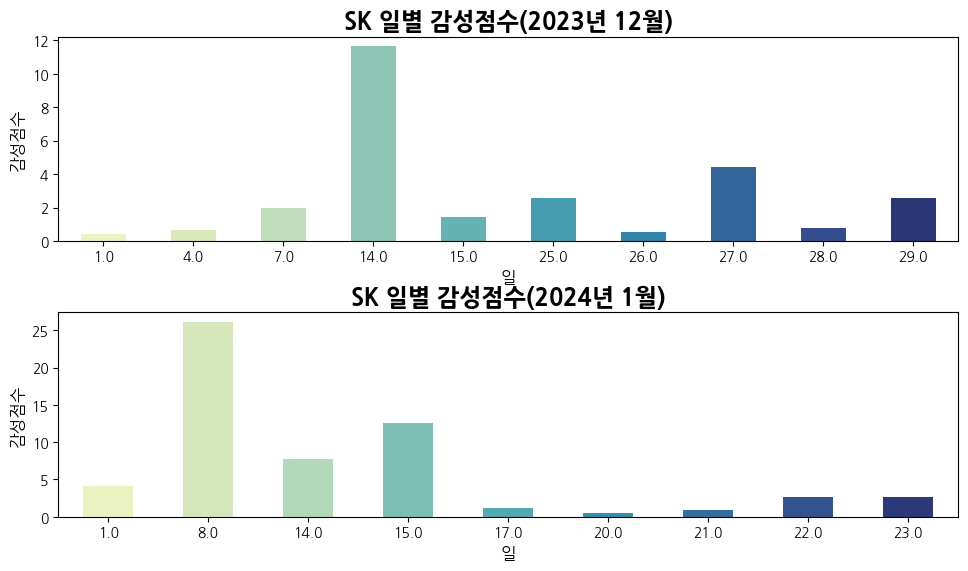

In [14]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1, top=0.9, wspace=0.3, hspace=0.35)
plt.subplot(2, 1, 1)
sns.barplot(x = monthly_score["일"][:10], y = monthly_score["감성점수"], palette="YlGnBu", width = 0.5)
plt.title("SK 일별 감성점수(2023년 12월)", fontsize = 17, weight = "bold")
plt.xlabel("일", fontsize = 12)
plt.ylabel("감성점수", fontsize = 12)
# plt.ylim(200, 450)

plt.subplot(2, 1, 2)
sns.barplot(x = monthly_score["일"][10:], y = monthly_score["감성점수"], palette="YlGnBu", width = 0.5)
plt.title("SK 일별 감성점수(2024년 1월)", fontsize = 17, weight = "bold")
plt.xlabel("일", fontsize = 12)
plt.ylabel("감성점수", fontsize = 12)
plt.show()